In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib notebook

In [200]:
tStep=6000
height=np.zeros(int(tStep/2))

center=12.0#3
bandWidth=0.05

prefix="./Source_waveSurf/waveSurf_1226_1953_"
fName=prefix+"parameters.dat"
readFile=open(fName,"r")

for line in readFile:
    print(line)

fName=prefix+"data.dat"
readFile=open(fName,"r")
spaceCount=0
indexCount=0
stepCount=0
ymax=0

for line in readFile:
    if line=='\n':
        spaceCount+=1 
        #print("%d %d"%(spaceCount, indexCount))
        if(indexCount%2!=0 and spaceCount==1):
            height[stepCount]=ymax
            stepCount+=1
            ymax=0
    if (line!='\n' and (indexCount%2)!=0):
        splitted=line.split()
        px=splitted[1]
        px=float(px)
        if(center-bandWidth < px and px < center+bandWidth):
            py=splitted[2]
            py=float(py)
            if(py>ymax):
                ymax=py
    if spaceCount==2:
        indexCount+=1
        spaceCount=0
    if indexCount>tStep:
        break
    if not line:
        print(stepCount)
        break



readFile.close()
print("end")

Source Image waveSurf.png

FLP:9005 BP:1338 OBP:1

Impact Velocity:0.000000 Angle of Incident:1.570796

XSIZE:246 YSIZE:103

interval:0.100000 Bucket Length0.300000

MAX_X:40 MIN_X:-20 MAX_Y:40 MIN_Y:-5

ENLARGEMENT RATIO 3.00 

CONTACT_ANGLE 0.785398

FLUID_INTERACTION:0.000000 HPHILY_INTERACTION:0.000000 HPHOBY_INTERACTION:-0.000000

BOUNDARY_FORCE:0

cs:80.00 m:2.617994 rigidMass:7.853982 h_smooth:0.100000 rho0:1000.000000 dt:0.00010000 kappa:10.000000 nu:0.020000 g:9.800000 T:300000 

DAMPTIME:5 MOTION_START_TIME:5005





Calculation started:2018/12/26 Wed 19:53:04

Calculation finished:2018/12/27 Thu 01:35:44

end


In [201]:
print(stepCount)
time=np.arange(0, stepCount*0.01, 0.01)
print(time.size)
print(height.size)

3000
3000
3000


<IPython.core.display.Javascript object>


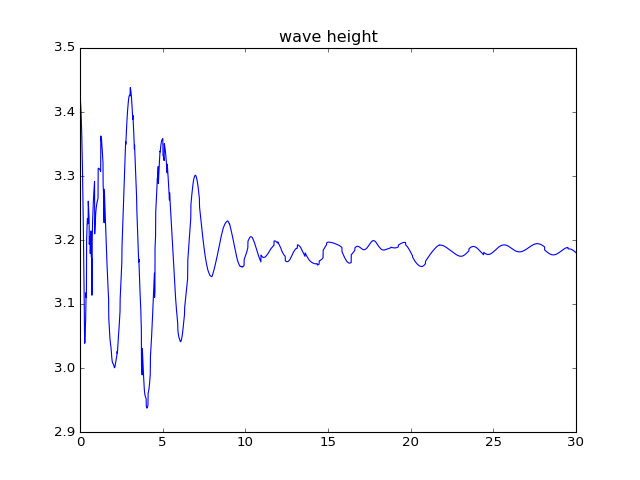

In [202]:

plt.title("wave height")
plt.plot(time,height)

In [208]:
dirSplitted=prefix.split("/")
imgName=prefix+".png"
print(imgName)
plt.savefig(imgName)

./Source_waveSurf/waveSurf_1226_1953_.png


In [132]:
pi=np.pi
g=9.8
k=2.0*pi/6.0
h=3.0
omega=2.0*pi/1.5
print("k:%f"%k)
print("omega:%f"%omega)
gamma=(omega*omega-g*k*np.tanh(k*h))/(k*k*k*np.tanh(k*h)/1000.0)
print("gamma:%f"%gamma)
lam_m=2.0*pi*np.sqrt(gamma/(1000.0*g))
print("lambda_m:%f"%lam_m)

k:1.047198
omega:4.188790
gamma:6399.517751
lambda_m:5.077389


In [184]:
plt.savefig("./Source_waveSurf/withSurfT30.png")

In [189]:
freq=np.fft.fft(height)

In [190]:
f_abs=np.abs(freq)
plt.plot(f_abs)

In [191]:
freq

array([  9.55937444e+03+0.j        ,   7.56804671e+00-3.50363491j,
         3.41003752e+00-1.07263628j, ...,   6.56718594e+00-4.56540927j,
         3.41003752e+00+1.07263628j,   7.56804671e+00+3.50363491j])